<a href="https://colab.research.google.com/github/Thibooooo/Optimisation-Course/blob/main/Optimization_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Subset Sum**

In [1]:
# Print all subsets if there is at least one subset of set[]
# with a sum equal to the given sum
flag = False

def print_subset_sum(i, n, _set, target_sum, subset):
	global flag
	# If targetSum is zero, then there exists a subset
	if target_sum == 0:
		# Prints valid subset
		flag = True
		print("[", end=" ")
		for element in subset:
			print(element, end=" ")
		print("]", end=" ")
		return

	if i == n:
		# Return if we have reached the end of the array
		return

	# Not considering the current element
	print_subset_sum(i + 1, n, _set, target_sum, subset)

	# Consider the current element if it is less than or equal to targetSum
	if _set[i] <= target_sum:
		# Push the current element into the subset
		subset.append(_set[i])

		# Recursive call for considering the current element
		print_subset_sum(i + 1, n, _set, target_sum - _set[i], subset)

		# Remove the last element after recursive call to restore subset's original configuration
		subset.pop()

# Driver code
if __name__ == "__main__":
	# Test case 1
	set_1 = [1, 2, 1]
	sum_1 = 3
	n_1 = len(set_1)
	subset_1 = []
	print("Output 1:")
	print_subset_sum(0, n_1, set_1, sum_1, subset_1)
	print()
	flag = False

	# Test case 2
	set_2 = [3, 34, 4, 12, 5, 2]
	sum_2 = 30
	n_2 = len(set_2)
	subset_2 = []
	print("Output 2:")
	print_subset_sum(0, n_2, set_2, sum_2, subset_2)
	if not flag:
		print("There is no such subset")

Output 1:
[ 2 1 ] [ 1 2 ] 
Output 2:
There is no such subset


**Subset Sum with time plot**

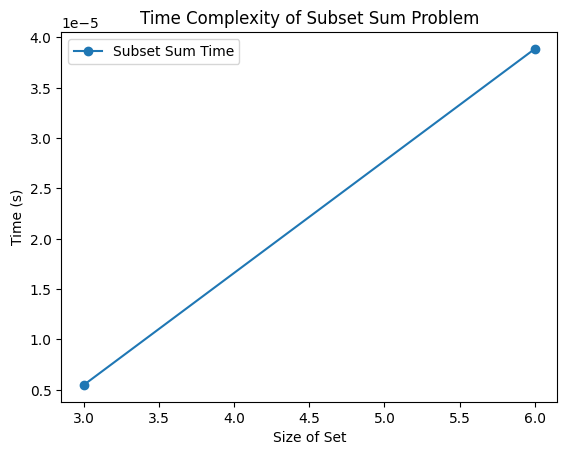

In [2]:
import time
import matplotlib.pyplot as plt

# Fonction pour résoudre le problème de la somme des sous-ensembles
def print_subset_sum(i, n, _set, target_sum, subset):
    if target_sum == 0:
        return True

    if i == n:
        return False

    if _set[i] <= target_sum:
        subset.append(_set[i])
        if print_subset_sum(i + 1, n, _set, target_sum - _set[i], subset):
            return True
        subset.pop()

    return print_subset_sum(i + 1, n, _set, target_sum, subset)

# Test des cas et enregistrement des temps
set_1 = [1, 2, 1]
set_2 = [3, 34, 4, 12, 5, 2]
sum_1 = 3
sum_2 = 30
problem_sizes = [len(set_1), len(set_2)]
subset_sum_times = []

for _set, target_sum in [(set_1, sum_1), (set_2, sum_2)]:
    start_time = time.time()
    subset = []
    print_subset_sum(0, len(_set), _set, target_sum, subset)
    end_time = time.time()
    subset_sum_times.append(end_time - start_time)

# Tracé du temps en fonction de la taille du problème
plt.plot(problem_sizes, subset_sum_times, marker='o', label='Subset Sum Time')
plt.xlabel('Size of Set')
plt.ylabel('Time (s)')
plt.title('Time Complexity of Subset Sum Problem')
plt.legend()
plt.show()

**Traveling Salesman Problem**

In [5]:
# Python3 program to implement traveling salesman
# problem using naive approach.
from sys import maxsize
from itertools import permutations
V = 4

# implementation of traveling Salesman Problem
def travellingSalesmanProblem(graph, s):

	# store all vertex apart from source vertex
	vertex = []
	for i in range(V):
		if i != s:
			vertex.append(i)

	# store minimum weight Hamiltonian Cycle
	min_path = maxsize
	next_permutation=permutations(vertex)
	for i in next_permutation:

		# store current Path weight(cost)
		current_pathweight = 0

		# compute current path weight
		k = s
		for j in i:
			current_pathweight += graph[k][j]
			k = j
		current_pathweight += graph[k][s]

		# update minimum
		min_path = min(min_path, current_pathweight)

	return min_path


# Driver Code
if __name__ == "__main__":

	# matrix representation of graph
	graph = [[0, 10, 15, 20], [10, 0, 35, 25],
			[15, 35, 0, 30], [20, 25, 30, 0]]
	s = 0
	print(travellingSalesmanProblem(graph, s))

80


**Traveling Salesman Problem with time plot**

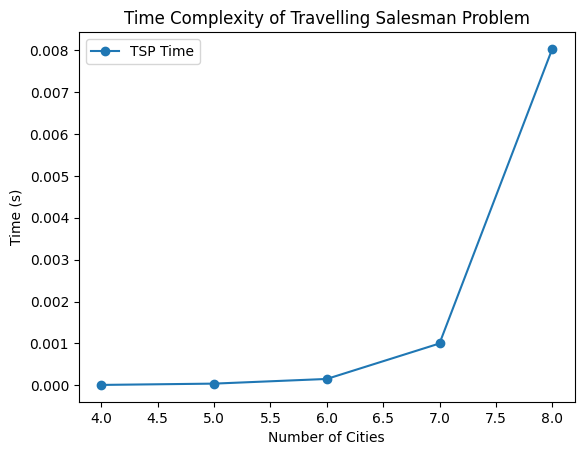

In [4]:
import time
import matplotlib.pyplot as plt
from itertools import permutations

# Fonction pour résoudre le problème du voyageur de commerce
def travellingSalesmanProblem(graph, s):
    vertex = [i for i in range(len(graph)) if i != s]
    min_path = float('inf')
    next_permutation = permutations(vertex)

    start_time = time.time()
    for path in next_permutation:
        current_pathweight = 0
        k = s
        for j in path:
            current_pathweight += graph[k][j]
            k = j
        current_pathweight += graph[k][s]
        min_path = min(min_path, current_pathweight)

    end_time = time.time()
    return min_path, end_time - start_time

# Définition du graphe
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
starting_city = 0

# Test et enregistrement des temps
problem_sizes = [4, 5, 6, 7, 8]
tsp_times = []
for size in problem_sizes:
    graph = [[0] * size for _ in range(size)]
    for i in range(size):
        for j in range(size):
            graph[i][j] = i + j  # Valeurs fictives, juste pour l'exemple
    min_path, time_taken = travellingSalesmanProblem(graph, starting_city)
    tsp_times.append(time_taken)

# Tracé du temps en fonction de la taille du problème
plt.plot(problem_sizes, tsp_times, marker='o', label='TSP Time')
plt.xlabel('Number of Cities')
plt.ylabel('Time (s)')
plt.title('Time Complexity of Travelling Salesman Problem')
plt.legend()
plt.show()